# 18 UNDERSTANDING EXPERIMENTAL DATA

This chapter is about `understanding experimental data`. We will make extensive use of `plotting to visualize the data`, and show how to use `linear regression` to build a model of experimental data.

## 18.1 The Behavior of Springs

Springs are wonderful things. When they are compressed or stretched by some force,they store energy. When that force is no longer applied they release the stored energy. This property allows them to smooth the ride in cars, help mattresses conform to our bodies, retract seat belts, and launch projectiles.

In 1676 the British physicist Robert Hooke formulated **Hooke’s law** of elasticity: 

$F = kx$

or, equivalently, 

$x={\frac{F}{k}}$

Hooke's law for a spring is often stated under the convention that  $F$ is the `restoring force` exerted by the spring on whatever is pulling its free end. In that case, the equation becomes 

$F = -kx$

since the `direction of the restoring force` is `opposite` to that of the `displacement`. 

In other words, the `force` $F$ stored in a spring is `linearly` related to the `distance` the spring has been compressed (or stretched).

All springs have an <b>elastic limit</b>, beyond which the law fails. 

The constant of proportionality, `k`, is called <b>the spring constant</b>. 

* Knowing the <b>spring constant</b> of a particular spring can be <b>a matter of some import</b>

Generations of physics students have learned to `estimate spring constants` using an `experimental apparatus` similar to that pictured here. 

![](./img/spring.PNG) 

We start with a spring with no weight on it, and measure the distance to the bottom of the spring from the top of the stand. We then hang a known mass on the spring, and wait for it to stop moving. At this point, the force stored in the spring is the force exerted on the spring by the weight hanging from it.

This is the value of  $F$ in `Hooke’s law`. We again measure the `distance` from the bottom of the spring to the top of the stand. The `difference` between this distance and the distance before we hung the weight then becomes the value of  $x$ in `Hooke’s law`. 

We know that the force, $F$, being exerted on the spring is equal to the mass, $m$, multiplied by the acceleration due to gravity, $g$ ( $9.81 m/s^2$ is a pretty good approximation of $g$ on this planet), so we substitute $m*g$ for $F$. 

By simple algebra,we know that $k = -(m*g)/x$


### `Robust` experiment

A more **robust experiment** is to hang a `series` of increasingly heavier weights on the spring, measure the stretch of the spring each time, and plot the results.

We ran such an experiment,and typed the results into a file named `./data/springData.txt`:


In [25]:
%%file ./data/springData.txt
Distance (m) Mass (kg)
0.0865 0.1
0.1015 0.15
0.1106 0.2
0.1279 0.25
0.1892 0.3
0.2695 0.35
0.2888 0.4
0.2425 0.45
0.3465 0.5
0.3225 0.55
0.3764 0.6
0.4263 0.65
0.4562 0.7
0.4502 0.75
0.4499 0.8
0.4534 0.85
0.4416 0.9
0.4304 0.95
0.437 1.0

Overwriting ./data/springData.txt


In [ ]:
# %load ./data/springData.txt
Distance (m) Mass (kg)
0.0865 0.1
0.1015 0.15
0.1106 0.2
0.1279 0.25
0.1892 0.3
0.2695 0.35
0.2888 0.4
0.2425 0.45
0.3465 0.5
0.3225 0.55
0.3764 0.6
0.4263 0.65
0.4562 0.7
0.4502 0.75
0.4499 0.8
0.4534 0.85
0.4416 0.9
0.4304 0.95
0.437 1.0

### The data file in CVS

In [1]:
%%file ./data/springData.csv
Distance(m),Mass(kg)
0.0865,0.1
0.1015,0.15
0.1106,0.2
0.1279,0.25
0.1892,0.3
0.2695,0.35
0.2888,0.4
0.2425,0.45
0.3465,0.5
0.3225,0.55
0.3764,0.6
0.4263,0.65
0.4562,0.7
0.4502,0.75
0.4499,0.8
0.4534,0.85
0.4416,0.9
0.4304,0.95
0.437,1.0

Overwriting ./data/springData.csv


### Comma-separated values

https://en.wikipedia.org/wiki/Comma-separated_values
    
In computing, a comma-separated values (**CSV**) file stores **tabular** data (numbers and text) in **plain text**.

* Each **line** of the file is a data **record**
. 
* Each **record** consists of one or more **fields**, separated by **commas**.    

CSV is **a common data exchange format** that is widely supported by consumer, business, and scientific applications. 

For example, a user may need to transfer information from a **database** program that stores data in a proprietary format, to a **spreadsheet** that uses a completely different format. 

The database program most likely can export its data as "CSV"; the exported CSV file can then be imported by the spreadsheet program.

In [ ]:
%load './data/springData.csv'

The `getData` function reads data from a file such as the one we saved, and returns lists containing the `distances` and `masse`s.

In [2]:
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    discardHeader = dataFile.readline()# Distance(m),Mass(kg)
    for line in dataFile:
        #d, m = line.split(' ')  
        d, m = line.split(',')
        #d, m = line.split()  #  blank separated
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

#inputFile='./data/springData.txt'
inputFile='./data/springData.csv'
masses, distances = getData(inputFile)
print(masses)
print(distances)

[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
[0.0865, 0.1015, 0.1106, 0.1279, 0.1892, 0.2695, 0.2888, 0.2425, 0.3465, 0.3225, 0.3764, 0.4263, 0.4562, 0.4502, 0.4499, 0.4534, 0.4416, 0.4304, 0.437]


The `plotData`function uses  the experimental data `masses, distances` from the file and then produces the plot 

* [Lecture3-2-11_PLOTTING_AND_MORE_ABOUT_CLASSES.ipynb](./Lecture3-2-11_PLOTTING_AND_MORE_ABOUT_CLASSES.ipynb)

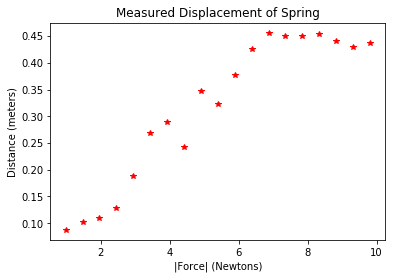

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def plotData(masses, distances):
    masses = np.array(masses)
    distances = np.array(distances)
   
    forces = masses*9.81
    
    plt.plot(forces, distances, 'r*')
    
    plt.title('Measured Displacement of Spring')
    plt.xlabel('|Force| (Newtons)')
    plt.ylabel('Distance (meters)')
    
    plt.savefig('./img/MeasuredDisplacementofSpring.png') # save figure

inputFile='./data/springData.csv'
masses, distances = getData(inputFile)
plotData(masses, distances)



![fig](./img/MeasuredDisplacementofSpring.png)

This is`not` what `Hooke’s law` predicts.Hooke’s law tells us that the distance should increase `linearly` with the mass, i.e., the points should lie on a `straight line` the slope of which is determined by the spring constant. Of course, we know that when we take `real measurements` the experimental data are rarely a `perfect match for the theor`y.

**Measurement error** is to be expected, so we should expect the points to lie `around a line` rather than on it.

Still, it would be nice to see a line that represents our `best guess` of where the points would have been if we had no measurement error. The usual way to do this is to fit a line to the data.

### 18.1.1 Using Linear Regression to Find a Fit

Whenever we fit any curve (including a line) to data we need some way to decide `which curve is the best fit for the data`. This means that we need to define `an objective function` that provides `a quantitative assessment of how well the curve fits the data`. Once we have such a function, finding the best fit can be formulated as finding a curve that minimizes (or maximizes) the value of that function, i.e., as an optimization problem (see Chapters 12 and 13).

* Objective function provides a quantitative assessment of how well the curve fits the data.

The most commonly used objective function is called <b>least squares</b>,

The objective function is then defined as

$\sum_{i=0}^{len(observed)-1}(observed[i]-predicted[i])^2$

####  Numpy.polyfit

http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

`Numpy` provides a function, `polyfit`, that finds the best Least squares polynomial fit.

Fit a polynomial

$p(x) = p[0] * x^{deg} + ... + p[deg]$

of degree deg to points (x, y). 

Returns a vector of coefficients p that minimises the squared error.

```python

numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)

numpy.polyfit(observedXVals, observedYVals, n)

numpy.polyfit(observedXVals, observedYVals, 1) # y = ax + b

numpy.polyfit(observedXVals, observedYVals, 2) # y = ax^2 + bx+c
```
The algorithm used by `polyfit` is called <b>linear regression</b>.

##### Numpy : Array Creation

https://docs.scipy.org/doc/numpy/user/quickstart.html

NumPy’s main object is the `homogeneous multidimensional array`. It is a table of elements (usually numbers), all of the `same` type, indexed by a tuple of positive integers.

There are several ways to create arrays.
For example, you can create an array from a regular Python list or tuple using the `array` function. The type of the resulting array is deduced from the type of the elements in the sequences.


In [7]:
import numpy as np
a = np.array([2,3,4])
a

array([2, 3, 4])

#### Numpy: Arithmetic Operations : elementwise

Arithmetic operators on arrays apply **elementwise**. A new array is created and filled with the result.

In [9]:
a = np.array([20,30,40,50] )
b = np.arange( 4 )
b

array([0, 1, 2, 3])

##### Arithmetic operators on arrays apply elementwise

In [10]:
c = a-b
c

array([20, 29, 38, 47])

In [12]:
b**2

array([0, 1, 4, 9], dtype=int32)

In [13]:
10*np.sin(a)


array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

In [14]:
a<35


array([ True,  True, False, False])

#### The simple example of numpy.polyfit

In [ ]:
import numpy as np

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
z

##### Using `numpy.polyfit` 

The function `linearfitData` extends the `plotData` function by adding a line that represents the best fit for the data.

It uses `numpy.polyfit` to find the coefficients $a$ and $b$, and then uses those coefficients to generate the predicted spring displacement for each force.


There is an asymmetry in the way `forces` and `distance` are treated. The values in `forces` (which are derived from the mass suspended
from the spring) are treated as `independent`, and used to produce the values in the `dependent variable predictedDistances` (a prediction of the displacements produced by suspending the mass).

The function also computes the spring constant, $k$. The slope of the line, $a$, is $Δdistance/Δforce$. The spring constant, on the other hand, is $Δforce/Δdistance$. Consequently, $k$ is the inverse of $a$.


In [4]:
def linearfitData(masses, distances):
    distances = np.array(distances)
    masses = np.array(masses)
    forces = masses*9.81
    
    # add : the  linear fit
    a,b = np.polyfit(forces, distances, 1)
    
    predictedDistances = a*np.array(forces) + b # elementwise
    
    return a,b,predictedDistances

##### [matplotlib.pyplot.legend](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.legend.html): 

`plt.legend(loc = 'best')`: Place a legend on the axes.

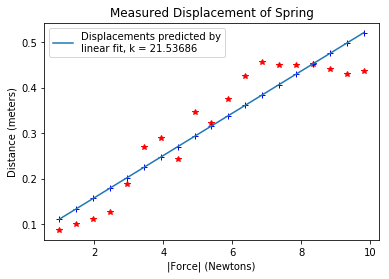

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def plotlinearfitData(a, masses, predictedDistance):
    masses = np.array(masses)
    forces = masses*9.81
    # the spring constant, k
    k = 1.0/a
    
    plt.plot(forces, predictedDistances,"b+")
    
    plt.plot(forces, predictedDistances,
               label = 'Displacements predicted by\nlinear fit, k = '
               + str(round(k, 5)))   
   
    plt.legend(loc = 'best') #Place a legend on the axes.

plotData(masses, distances)
# Using numpy.polyfit
a,b,predictedDistances=linearfitData(masses, distances)
plotlinearfitData(a,masses,predictedDistances)    

It is interesting to observe that <b>very few points</b> actually lie on the least-squares fit.

It doesn’t look like a great fit. Let’s try a `cubic fit` 

In [19]:
def cubfitData(masses, distances):
    distances = np.array(distances)
    masses = np.array(masses)
    forces = masses*9.81

    #add cubit fit
    a,b,c,d = np.polyfit(forces, distances, 3)
    predictedDistances = a*(forces**3) + b*forces**2 + c*forces + d
    
    return a,b,c,d,predictedDistances


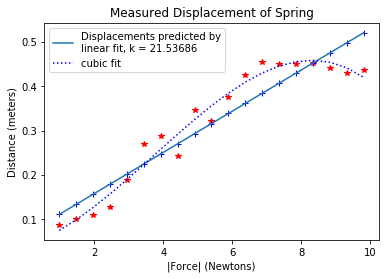

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plotcubfitData(masses, distances):
    masses = np.array(masses)
    forces = masses*9.81
    #add cubit fit
  
    plt.plot(forces, predictedDistances, 'b:', label = 'cubic fit')

    plt.legend(loc = 'best')

plotData(masses, distances)
# linearfit
a,b,predictedDistances=linearfitData( masses, distances)
plotlinearfitData(a,masses,predictedDistances)
# cubfit
a,b,c,d,predictedDistances=cubfitData(masses, distances)
plotcubfitData(masses, distances)

The cubic fit <b>looks like</b> a much better model of the data, but is it? <b>Probably not</b>.

The <b>raw data</b> merely an indication of <b>experimental error</b>. This can be dangerous.

Recall that we started with a theory that there should be <b>a linear relationship</b> between the x and y values, not
a cubic one.

Let’s see what happens if we use our cubic fit to predict where the point corresponding to <b>1.5kg</b> would lie.


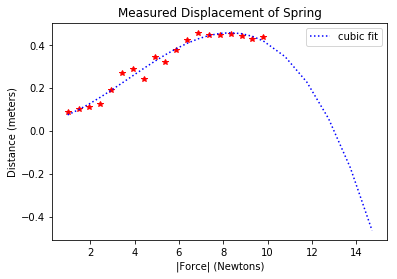

In [27]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def outsidefitData(a,b,c,d,outsidepoints,masses, distances):
    masses=masses+outsidepoints
    masses = np.array(masses)
    forces = masses*9.81
    # predict where the point corresponding to 1.5kg would lie  
    predictedDistances = a*(forces**3) + b*forces**2 + c*forces + d
    plt.plot(forces, predictedDistances, 'b:', label = 'cubic fit')

    plt.legend(loc = 'best')

inputFile='./data/springData.csv'
masses, distances = getData(inputFile)
plotData(masses, distances)

a,b,c,d,predictedDistances=cubfitData(masses, distances)
# predict where the point corresponding to 1.5kg would lie  
outsidepoints=[1.1,1.2,1.3,1.4,1.5]
outsidefitData(a,b,c,d,outsidepoints,masses, distances)
        

we have is an example of <b>overfitting</b>.

we recall that <b>Hooke’s law</b> holds only up to some <b>elastic limit</b>. 

Perhaps that limit is reached for this spring somewhere around <b>7N</b> (approximately 0.7kg).

Let’s see what happens if we eliminate the last six points by replacing the second and third lines of fitData by

```python
 distances[:-6]
  masses[:-6]
```


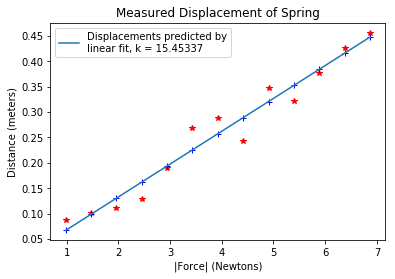

In [28]:
import numpy as np
import matplotlib.pyplot as plt

inputFile='./data/springData.csv'
masses, distances = getData(inputFile)

masses=masses[:-6]
distances=distances[:-6]

plotData(masses, distances)

a,b,predictedDistances=linearfitData(masses, distances)

plotlinearfitData(a,masses,predictedDistances)

#a,b,c,d,predictedDistances=cubfitData(masses, distances)
#plotcubfitData(masses, distances)

Eliminating those points certainly makes a <b>difference</b>

* `k` has dropped dramatically and the **linear** and **cubic** fits are almost  **indistinguishable**. 

But how do we know which of the two linear fits is a better representation of how our spring performs up to its elastic limit? 

One should never throw out experimental results <b>merely to get a better fit</b>. 


## 18.2 The Behavior of Projectiles

Growing bored with merely stretching springs, we decided to use one of our springs to build `a device capable of launching a projectile`. 

We used the device **four** times to fire a projectile at `a target 30 yards (1080 inches)` from the `launching point`. 

Each time, we measured `the height of the projectile` at various `distances from the launching point`.

The `launching point` and the `target` were at `the same height`, which we treated as `0.0` in our measurements.

![projectile](./img/projectile.jpg)

The data was stored in a file `./data/projectileData.txt`

* The `first column` contains `distances of the projectile from the target`. 

* The `other columns` contain `the height of the projectile at that distance` for each of the four trials. 

All of the measurements are in **inches**.

In [1]:
%%file ./data/projectileData.txt
Distance  	trial1	trial2	trial3	trial3
1080	  	0.0	    0.0		0.0		0.0
1044		2.25	3.25	4.5		6.5	
1008		5.25	6.5		6.5		8.75
972			7.5		7.75	8.25	9.25
936			8.75	9.25	9.5		10.5
900			12.0	12.25	12.5	14.75
864			13.75	16.0	16.6	16.5
828			14.75	15.25	15.5	17.5
792			15.5	16.0	16.6	16.75
756			17.0	17.0	17.5	19.25
720			17.5	18.5	18.5	19.0
540			19.5	18.5	19.0	19.0
360			18.5	18.5	19.0	19.0
180			13.0	13.0	13.0	13.0
0			0.0		0.0		0.0		0.0

Overwriting ./data/projectileData.txt


The following code was used to plot the **mean altitude of the projectile(Y)** against the **distance from the point of launch(X)**.

It also plots the best linear and quadratic fits to the points.

In [2]:
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

In [3]:
fileName='./data/projectileData.txt'
distances, heights = getTrajectoryData(fileName)

In [31]:
print(distances)

[1080.0, 1044.0, 1008.0, 972.0, 936.0, 900.0, 864.0, 828.0, 792.0, 756.0, 720.0, 540.0, 360.0, 180.0, 0.0]


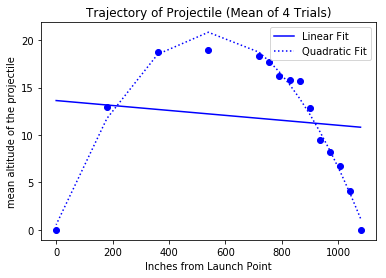

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def processTrajectories(distances, heights):
    numTrials = len(heights)
    distances = np.array(distances)
    
    #Get array containing mean height at each distance
    totHeights =np.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights +np.array(h)
    meanHeights = totHeights/len(heights)
    
    plt.title('Trajectory of Projectile (Mean of '\
                + str(numTrials) + ' Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('mean altitude of the projectile')
    
    plt.plot(distances, meanHeights, 'bo')
    
    a,b = np.polyfit(distances, meanHeights, 1)
  
    altitudes = a*distances + b
    
    plt.plot(distances, altitudes, 'b', label = 'Linear Fit')
    
    a,b,c = np.polyfit(distances, meanHeights, 2)
 
    altitudes = a*(distances**2) +  b*distances + c
    
    plt.plot(distances, altitudes, 'b:', label = 'Quadratic Fit')
    plt.legend()

processTrajectories(distances, heights)

In [ ]:
%load './data/projectileData.txt'

In [33]:
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    d2hs=[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        dh = line.split()
        d2h={'d':None,'h':[]}
        d2h['d']=float(dh[0])
        trials=len(dh)-1
        for i in range(trials):
            d2h['h'].append(float(dh[i+1]))
        d2hs.append(d2h)
    dataFile.close()
    return  d2hs,trials

In [34]:
fileName='./data/projectileData.txt'
d2hs,trials = getTrajectoryData(fileName)
for item in d2hs:
    print(item)
  

{'d': 1080.0, 'h': [0.0, 0.0, 0.0, 0.0]}
{'d': 1044.0, 'h': [2.25, 3.25, 4.5, 6.5]}
{'d': 1008.0, 'h': [5.25, 6.5, 6.5, 8.75]}
{'d': 972.0, 'h': [7.5, 7.75, 8.25, 9.25]}
{'d': 936.0, 'h': [8.75, 9.25, 9.5, 10.5]}
{'d': 900.0, 'h': [12.0, 12.25, 12.5, 14.75]}
{'d': 864.0, 'h': [13.75, 16.0, 16.6, 16.5]}
{'d': 828.0, 'h': [14.75, 15.25, 15.5, 17.5]}
{'d': 792.0, 'h': [15.5, 16.0, 16.6, 16.75]}
{'d': 756.0, 'h': [17.0, 17.0, 17.5, 19.25]}
{'d': 720.0, 'h': [17.5, 18.5, 18.5, 19.0]}
{'d': 540.0, 'h': [19.5, 18.5, 19.0, 19.0]}
{'d': 360.0, 'h': [18.5, 18.5, 19.0, 19.0]}
{'d': 180.0, 'h': [13.0, 13.0, 13.0, 13.0]}
{'d': 0.0, 'h': [0.0, 0.0, 0.0, 0.0]}


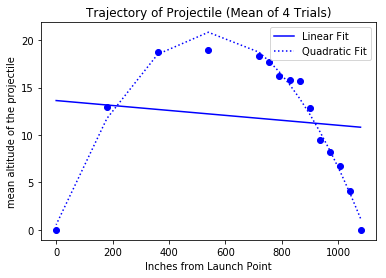

In [35]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def processTrajectories(d2hs,trials):
    numTrials = trials
    distances=[]
    meanHeights=[]
    
    for item in d2hs:
        distances.append(item['d'])
        meanHeights.append(np.mean(item['h']))
    
    plt.title('Trajectory of Projectile (Mean of '\
                + str(numTrials) + ' Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('mean altitude of the projectile')
    plt.plot( distances, meanHeights, 'bo')
   
    a,b = np.polyfit(distances, meanHeights, 1)
    altitudes = a*np.array(distances) + b
    plt.plot(distances, altitudes, 'b', label = 'Linear Fit')
    
    a,b,c = np.polyfit(distances, meanHeights, 2)
 
    altitudes = a*(np.array(distances)**2) +  b*np.array(distances) + c
    plt.plot(distances, altitudes, 'b:', label = 'Quadratic Fit')
    plt.legend()

processTrajectories(d2hs,trials)

A quick look at the plot on the right makes it quite clear that a quadratic fit is far better than a linear one

#####  how bad a fit is the line and how good is the quadratic fit?

### 18.2.1 Coefficient of Determination

Asking about **the goodness of a fit** is equivalent to asking about the accuracy of these predictions.

<b>The mean square error</b> is useful for comparing the <b>relative goodness</b> of two fits to the same data, 

it is <b>not particularly useful for getting a sense of the absolute goodness of a fit</b>.

We can calculate <b>the absolute goodness of a fit</b> using the <b>coefficient of determination</b>, often written as

$R^2$

Let:

* $y_i$ be the $i^{th}$ observed value,

* $p_i$ be the corresponding value predicted by model, and 

* $\mu$ be the mean of the observed values.

$R^2=1-\frac{\sum_{i}(y_i-p_i)^2}{\sum_{i}(y_i-\mu)^2}$

By comparing

<b>the estimation errors</b> (<b>RSS: residual sum of squares</b>,the numerator) 

$\sum_{i}(y_i-p_i)^2$

with

<b>the variability of the original values</b> ( <b>TSS: total sum of squares</b>,the denominator), 

$\sum_{i}(y_i-\mu)^2$

$R^2$ is intended to capture <b>the proportion of variability </b> in a data set that is accounted for by the statistical model provided by the fit.

Its <b>compactness</b> stems from the expressiveness of the operations on <b>arrays</b>.

In [ ]:
def rSquared(measured, predicted):
    """Assumes measured a one-dimensional array of measured values
               predicted a one-dimensional array of predicted values
       Returns coefficient of determination"""
    # RSS: residual sum of squares
    estimateError = ((predicted - measured)**2).sum()
    
    meanOfMeasured = measured.sum()/float(len(measured))
    
    # TSS: total sum of squares
    variability = ((measured - meanOfMeasured)**2).sum()
    
    return 1 - estimateError/variability

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def processTrajectories(distances, heights):
    
    numTrials = len(heights)
    distances = np.array(distances)
    
    #Get array containing mean height at each distance
    totHeights = np.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + np.array(h)
    
    meanHeights = totHeights/len(heights)
    
    plt.title('Trajectory of Projectile (Mean of '
                + str(numTrials) + ' Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('Inches Above Launch Point')
    plt.plot(distances, meanHeights, 'bo')
    
    a,b = np.polyfit(distances, meanHeights, 1)
    
    altitudes = a*distances + b
    
    residuals1=rSquared(meanHeights, altitudes)
    
    plt.plot(distances, altitudes, 'b', label = 'Linear Fit, $R^2$='+str(residuals1))
  
    #  full=True
    # Least-squares solution, residuals, rank, singular_values, rcond 
    solution,residuals,rank,s,rcond= np.polyfit(distances, meanHeights, 2,full=True)
  
    altitudes = solution[0]*(distances**2) +  solution[1]*distances + solution[2]
    
    r2quad=rSquared(meanHeights, altitudes)
    
    plt.plot(distances, altitudes, 'b:', label = 'Quadratic Fit, $R^2$='+str(r2quad))
    
    plt.legend()
    
processTrajectories(distances, heights)

This tells us that 

* 1 less than 2% of the variation in the measured data can be explained by the linear model,

* 2 more than 98% of the  variation can be explained by the quadratic model

### 18.2.2 Using a Computational Mode

One interesting question is <b>the horizontal speed</b> at which the projectile is traveling when it hits the target. 

We might use the following train of thought to design <b>a computation</b> that answers this question:
    

1 Its <b>peak</b> occurs halfway  between the launch point and the target; call this value $xMid$. 
The peak height, 

 $yPeak=a*xMid^2+b*xMid+c$
 
2  we can compute <b>the amount of time</b> it takes for the projectile to <b>fall from $yPeak$ to
the height of the target</b>, because that is purely a function of gravity. It is  given by the equation:

$t=\sqrt{\frac{2*yPeak}{g}}$

https://en.wikipedia.org/wiki/Equations_for_a_falling_body

3 Given the time to go from $xMid$ to the target, we can easily compute the average horizontal speed of the projectile over that interval. 
we can use the average horizontal speed as an estimate of the horizontal speed when the projectile hits the target
  

In [ ]:
def getHorizontalSpeed(a, b, c, minX, maxX):
    """Assumes minX and maxX are distances in inches
       Returns horizontal speed in feet per second"""
    inchesPerFoot = 12.0
    
    xMid = (maxX - minX)/2.0
    yPeak = a*xMid**2 + b*xMid + c
    
    g = 32.16*inchesPerFoot #accel. of gravity in inches/sec/sec
    
    t = (2*yPeak/g)**0.5
    print('Horizontal speed =', int(xMid/(t*inchesPerFoot)), 'feet/sec')


In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def processTrajectories(distances, heights):

    numTrials = len(heights)
    distances = np.array(distances)
    
    #Get array containing mean height at each distance
    totHeights = np.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + np.array(h)
    meanHeights = totHeights/len(heights)
    
    plt.title('Trajectory of Projectile (Mean of '\
                + str(numTrials) + ' Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('Inches Above Launch Point')
    plt.plot(distances, meanHeights, 'bo')
    
    a,b = np.polyfit(distances, meanHeights, 1)
    
    altitudes = a*distances + b
    
    r2linear=rSquared(meanHeights, altitudes)
        
    plt.plot(distances, altitudes, 'b', label = 'Linear Fit, $R^2$='+str(r2linear))
    
    a,b,c = np.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) +  b*distances + c
    
    r2quad=rSquared(meanHeights, altitudes)
        
    plt.plot(distances, altitudes, 'b:', label = 'Quadratic Fit, $R^2$='+str(r2quad))
    
    plt.legend()
    
    getHorizontalSpeed(a, b, c, distances[-1],distances[0])
    
    
processTrajectories(distances, heights)

The sequence of steps we have just worked through follows <b>a common pattern</b> 

1.  We started by performing <b>an experiment</b> to get some data about <b>the behavior</b> of a physical system.

2. We then used computation to <b>find</b> and <b>evaluate</b> the quality of <b>a model</b> of the behavior of the system.

3. Finally, we used some <b>theory and analysis</b> to design a simple <b>computation</b> to derive an interesting <b>consequence of the model</b>.

## 18.3 Fitting Exponentially Distributed Data 

`Polyfit` uses linear regression to find a polynomial of a given degree that is the best least-squares fit for some data. 

But this is not always possible. Consider, for example, the simple **exponential growth function** $y = 2^x$.

The fellowing code fits a 4th-degree polynomial to the first ten points and plots the results.

In [ ]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plt

vals = []
for i in range(10):
    vals.append(2**i)
plt.plot(vals,'bo', label = 'Actual points')

xVals = np.arange(10)

a,b,c,d,e = np.polyfit(xVals, vals, 4)

yVals = a*(xVals**4) + b*(xVals**3) + c*(xVals**2)+ d*xVals + e

plt.plot(yVals, 'bx', label = 'Predicted points', markersize = 20)
plt.title('Fitting $y = 2^x$')
plt.legend(loc='best')
plt.show()

The fit is clearly a good one, for these data points. However, let’s look at what  the model predicts for $2^{20}$

In [ ]:
pred2to20 = a*(20**4) + b*(20**3) + c*(20**2)+ d*20 + e
print('Model predicts that 2**20 is roughly', round(pred2to20))
print('Actual value of 2**20 is', 2**20)

##### It is because no polynomial is a good fit for an exponential distribution.

we can use polyfit to find a curve that fits the original independent values and the <b>log</b> of the dependent values

If a function $y = f(x)$, exhibits exponential growth, the $log$ (to any base) of $f(x)$ grows linearly. 

This can be visualized by plotting an exponential function with a logarithmic y-axis.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

xVals, yVals = [], []
for i in range(10):
    xVals.append(i)
    yVals.append(2**i)
plt.plot(xVals, yVals)
plt.semilogy()
plt.show()

The fact that taking <b>the log of an exponential function</b> produces <b>a linear function</b> can be used to construct a model for an exponentially distributed set of data points.

In [ ]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt

#define an arbitrary exponential function
def f(x):
    return 3*(2**(1.2*x))

def createExpData(f, xVals):
    """Asssumes f is an exponential function of one argument
                xVals is an array of suitable arguments for f
       Returns array containing results of applying f to the
               elements of xVals"""
    yVals = []
    for i in range(len(xVals)):
        yVals.append(f(xVals[i]))
    return np.array(xVals), np.array(yVals)

def fitExpData(xVals, yVals):
    """Assumes xVals and yVals arrays of numbers such that
         yVals[i] == f(xVals[i])
       Returns a, b, base such that log(f(x), base) == ax + b"""
    
    logVals = []
    for y in yVals:
        logVals.append(math.log(y, 2.0)) #get log base 2
    
    a,b = np.polyfit(xVals, logVals, 1)
    return a, b, 2.0

xVals, yVals = createExpData(f, range(10))
plt.plot(xVals, yVals, 'ro', label = 'Actual values')
a, b, base = fitExpData(xVals, yVals)

predictedYVals = []
for x in xVals:
    predictedYVals.append(base**(a*x + b))
    
plt.plot(xVals, predictedYVals, label = 'Predicted values')
plt.title('Fitting an Exponential Function')
plt.legend()

#Look at a value for x not in original data
print('f(20) =', f(20))
print('Predicted f(20) =', base**(a*20 + b))


This method of using `polyfit` to find a model for data works when the relationship can be described by an equation of the form:

$y = base^{ax+b}$

 If used on  data that <b>cannot be described this way<b>, it will yield erroneous results

In [ ]:
#define an arbitrary exponential function
# cannot be described y=b^(ax+b)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3*(2**(1.2*x))+x

def createExpData(f, xVals):
    """Asssumes f is an exponential function of one argument
                xVals is an array of suitable arguments for f
       Returns array containing results of applying f to the
               elements of xVals"""
    yVals = []
    for i in range(len(xVals)):
        yVals.append(f(xVals[i]))
    return np.array(xVals), np.array(yVals)

def fitExpData(xVals, yVals):
    """Assumes xVals and yVals arrays of numbers such that
         yVals[i] == f(xVals[i])
       Returns a, b, base such that log(f(x), base) == ax + b"""
    
    logVals = []
    for y in yVals:
        logVals.append(math.log(y, 2.0)) #get log base 2
    
    a,b = np.polyfit(xVals, logVals, 1)
    return a, b, 2.0

xVals, yVals = createExpData(f, range(10))
plt.plot(xVals, yVals, 'ro', label = 'Actual values')
a, b, base = fitExpData(xVals, yVals)

predictedYVals = []
for x in xVals:
    predictedYVals.append(base**(a*x + b))

plt.plot(xVals, predictedYVals, label = 'Predicted values')
plt.title('Fitting an Exponential Function')
plt.legend(loc = 'best')
plt.show()

#Look at a value for x not in original data
print('f(20) =', f(20))
print('Predicted f(20) =', base**(a*20 + b))

### Further Reading： scipy.optimize.curve_fit

http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
    
    

In [1]:
# scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, 
#            check_finite=True, bounds=(-inf, inf), method=None, **kwargs)

import numpy as np
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
ydata = func(xdata, 2.5, 1.3, 0.5)

popt, pcov = curve_fit(func, xdata, ydata)

print(popt,'\n')
print(pcov)

[2.5 1.3 0.5] 

[[ 0.  0. -0.]
 [ 0.  0.  0.]
 [-0.  0.  0.]]


In [ ]:
def f(x,a,b,c):
    return a*(b**(c*x))

xdata = np.linspace(0, 9, 10)
ydata = func(xdata, 3, 2, 1.2)

popt, pcov = curve_fit(func, xdata, ydata)
print(popt,'\n')
print(pcov)

In [ ]:
def f(x,a,b,c,d):
    return a*(b**(c*x))+d*x

xdata = np.linspace(0, 9, 10)
ydata = f(xdata, 3, 2,1.2,1)

popt, pcov = curve_fit(f, xdata, ydata)
print(popt,'\n')
print(pcov)

print(f(20,3,2,1.2,1))
print(f(20,popt[0],popt[1],popt[2],popt[3]))

## 18.4 When Theory Is Missing

In an ideal world, we would run **a controlled experiment** (e.g., hang weights from a spring), study the results, and retrospectively formulate a model consistent
with those results.

Unfortunately, in many cases it is **impossible to run even one controlled experiment**

In such situations, one can **simulate a set of experiments** by dividing the existing data into **a training set** and **a holdout set**.

##### How does one choose the training set?

* 1. One way to do this is to **randomly choose the samples** for the training set.

* 2.  A related but slightly different way to check a model is to train on **many randomly selected subsets** of the original data, and see how similar the models are to one another. 

If they are quite similar, than we can feel pretty good. This  approach is known as **cross validation**. 


